## Содержание отчёта
1. [Результаты первичного анализа исходных данных](#результаты-первичного-анализа-данных)
  1. [Количество записей и признаков](#количество-записей-и-признаков)
  2. [Смысловое описание признаков](#смысловое-описание-признаков)
  3. [Типы данных столбцов и информация о пропусках](#типы-данных-столбцов-и-информация-о-пропусках)
  4. [Результат замены категориальных или ранговых данных на числовые](#результат-замены-категориальных-или-ранговых-данных-на-числовые)
  5. [Результат обработки пропущенных значений](#результат-обработки-пропущенных-значений)

2. [Обоснование выбора целевой переменной и признаков для анализа](#обоснование-выбора-целевой-переменной-и-признаков-для-анализа)
  1. [Перечень вариантов целевых переменных, исходя из п. 1.2.](#перечень-вариантов-целевых-переменных)
  2. [Матрица коэффициентов корреляции](#матрица-коэффициентов-корреляции)
  3. [Матрица смежности (графический вариант интерпретации взаимосвязей переменных)](#матрица-смежности)
  4. [Информация о целевом значении и признаках на него влияющих](#информация-о-целевом-значении-и-признаках-на-него-влияющих)
  5. [Результат отчистки выбранных признаков исходного массива от выбросов](#результат-отчистки-выбранных-признаков-исходного-массива-от-выбросов)

3. [Результаты анализа полученных регрессионных линейных моделей (m11,m12,m21,m22)](#результаты-анализа-полученных-регрессионных-линейных-моделей)
  1. [Уравнение линейной регрессии вида y(x_i, ...) =  K_i*x_i + ... + B](#уравнение-линейной-регрессии)
  2. [Оценка точности R2 и RMSE](#оценка-точности-R2-и-RMSE)
  3. [График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: выбранный признак, x: целевая переменная)](#график-полученной-линейной-зависимости)
  4. [Диаграмма рассеяния вычисленных значений Y_pred от проверочных значений Y_test](#диаграмма-рассеяния)
  5. [Гистограмма остатков (разностей между Y_pred и Y_test)](#гистограмма-остатков)

4. [Выводы по результатам сравнительного анализа полученных регрессионных моделей](#выводы)

## Результаты первичного анализа данных
Подключение библиотек

In [1]:
import pandas as pd
import numpy  as np

# pd.set_option('mode.use_inf_as_na', True)

import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/bike-sharing-dataset_nan.csv',
                   sep=',', 
                   header=0,       #если заголовки в нулевой строке таблицы
                   #  header=None  #если заголовки отсутствуют

                   na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
)

df[:5]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


## Количество записей и признаков

In [3]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записей, " + str(ncol) + " столбцов (признаков).")

(17379, 17)
Итого: 17379 записей, 17 столбцов (признаков).


In [4]:
df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17356.000000,17351.000000,17359.000000,17363.000000,17362.000000,17363.000000,17366.000000,17365.000000,17352.000000,17357.000000,17358.000000,17362.000000,17360.000000,17359.000000,17359.000000,17357.000000
mean,8686.832335,2.501239,0.502679,6.537868,11.547921,0.028797,3.003570,0.682753,1.425542,0.497088,0.475806,0.627195,0.190102,35.676998,153.730169,189.400645
std,5016.349071,1.107213,0.500007,3.439304,6.915699,0.167240,2.005833,0.465418,0.639497,0.192555,0.171834,0.192928,0.122334,49.313807,151.304605,181.377315
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4343.750000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8686.500000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13028.250000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Смысловое описание признаков

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	------------------------------------------------
    - casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Типы данных столбцов и информация о пропусках
Количество пропусков по столбцам и тип данных

In [6]:
df.isna().sum()

instant       23
dteday        18
season        28
yr            20
mnth          16
hr            17
holiday       16
weekday       13
workingday    14
weathersit    27
temp          22
atemp         21
hum           17
windspeed     19
casual        20
registered    20
cnt           22
dtype: int64

Как распределены отсутствующие результаты:

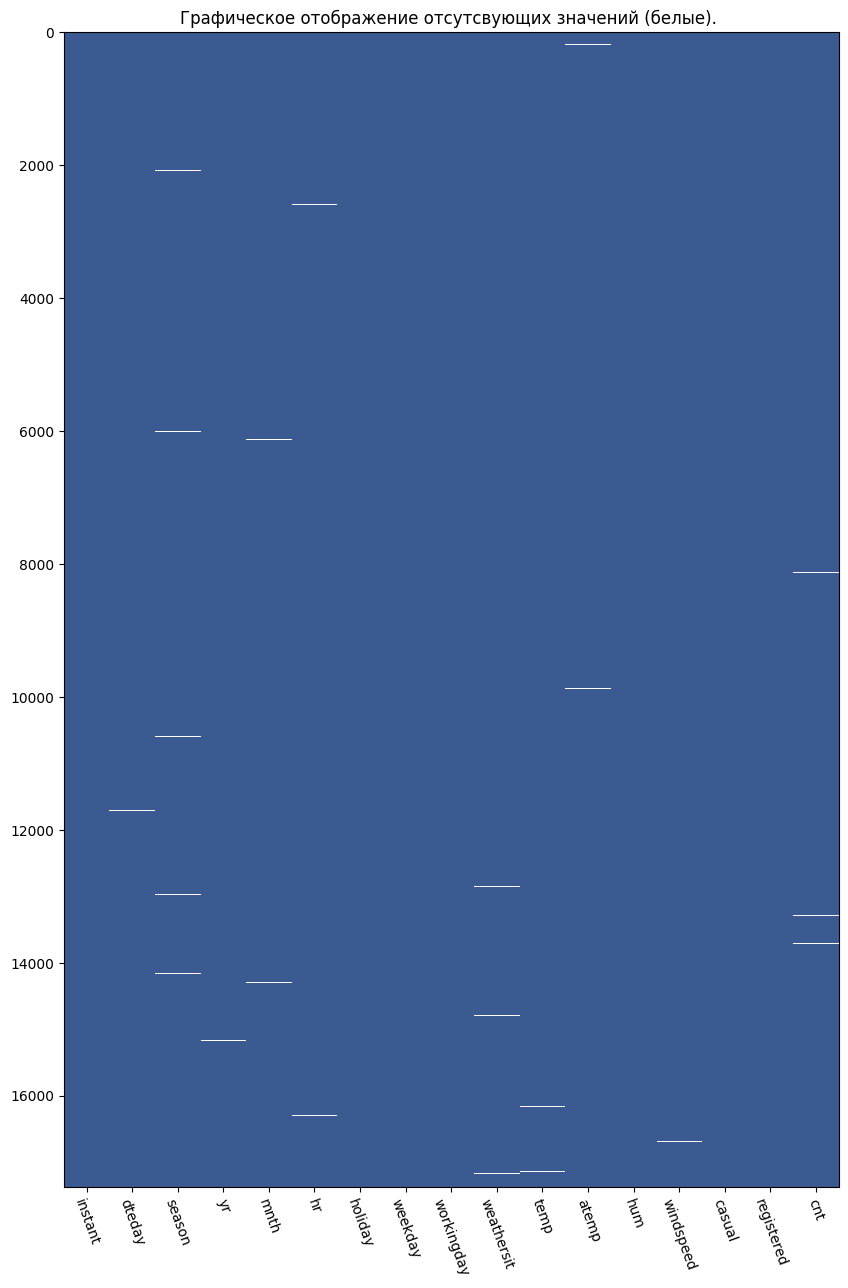

In [7]:
from matplotlib.colors import ListedColormap
def plotTableNA(dataF, addToTilte =""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if   len(dataF.columns)> 20:   K = 3
    elif len(dataF.columns)== 1:   K = 1
    else:                          K = 1.7

    figSizeH = 15        # размер полотна, высота
    figSizeW =int(len(dataF.columns)/K) # размер полотна, ширина
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH))

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра
    plt.imshow( dataF.isna(),
                cmap = ListedColormap([ '#3B5A92', 'white', ]), #cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]
                interpolation= 'none',)
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70,)
    plt.title("Графическое отображение отсутсвующих значений (белые). "+ addToTilte)

# Вызов функции с указанием параметров
plotTableNA(df)

# Результат замены категориальных или ранговых данных на числовые

Просмотр типов данных

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17356 non-null  float64
 1   dteday      17361 non-null  object 
 2   season      17351 non-null  float64
 3   yr          17359 non-null  float64
 4   mnth        17363 non-null  float64
 5   hr          17362 non-null  float64
 6   holiday     17363 non-null  float64
 7   weekday     17366 non-null  float64
 8   workingday  17365 non-null  float64
 9   weathersit  17352 non-null  float64
 10  temp        17357 non-null  float64
 11  atemp       17358 non-null  float64
 12  hum         17362 non-null  float64
 13  windspeed   17360 non-null  float64
 14  casual      17359 non-null  float64
 15  registered  17359 non-null  float64
 16  cnt         17357 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


Как видно из таблицы, все данные набора уже преобразованы к нужным типам данных.

Посмотрим на таблицу с количеством уникальных значений и докажем невозможность приведения типов.

In [9]:
df.describe(include=['object', 'bool'])

,dteday
count,17361
unique,731
top,2011-01-01
freq,24


Мы удалим этот столбец.

In [46]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_digPlus = df[numeric_cols]
df_digPlus[:5]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


Сохраним новые данные в файл:

In [11]:
df_digPlus.to_csv('./datasets/bike-sharing-dataset_nan_new.csv', index=False)

# Результат обработки пропущенных значений

In [12]:
df = df.dropna(axis='index', how='any')
print('Размер таблицы после исключения пропусков', df.shape)

Размер таблицы после исключения пропусков (17048, 17)


Проверка того, что строки действительно удалились

In [13]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Обоснование выбора целевой переменной и признаков для анализа

Построим матрицу корреляции

In [14]:
corr_df = df_digPlus.corr(method='pearson')
corr_df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.403600,0.865994,0.488897,-0.004851,0.014388,0.001510,-0.003825,-0.013956,0.136865,0.137878,0.009962,-0.074048,0.158535,0.281955,0.278600
season,0.403600,1.000000,-0.011027,0.830414,-0.006146,-0.009119,-0.002248,0.013405,-0.014444,0.312000,0.319365,0.151293,-0.149785,0.120191,0.174061,0.178251
yr,0.865994,-0.011027,1.000000,-0.010653,-0.003384,0.006578,-0.004551,-0.002080,-0.018716,0.041048,0.039061,-0.083239,-0.008811,0.142665,0.253544,0.250417
mnth,0.488897,0.830414,-0.010653,1.000000,-0.005768,0.018699,0.010608,-0.003550,0.005363,0.201646,0.207604,0.165021,-0.135437,0.068043,0.121852,0.120580
hr,-0.004851,-0.006146,-0.003384,-0.005768,1.000000,0.000386,-0.003081,0.002240,-0.020445,0.136962,0.133651,-0.276503,0.137228,0.301039,0.373815,0.393678
holiday,0.014388,-0.009119,0.006578,0.018699,0.000386,1.000000,-0.102112,-0.252679,-0.017050,-0.027504,-0.031076,-0.010552,0.003955,0.031544,-0.047299,-0.030948
weekday,0.001510,-0.002248,-0.004551,0.010608,-0.003081,-0.102112,1.000000,0.036770,0.004024,-0.001648,-0.008845,-0.036859,0.010842,0.032928,0.021856,0.027055
workingday,-0.003825,0.013405,-0.002080,-0.003550,0.002240,-0.252679,0.036770,1.000000,0.045460,0.055322,0.054657,0.016003,-0.012198,-0.300923,0.134154,0.030051
weathersit,-0.013956,-0.014444,-0.018716,0.005363,-0.020445,-0.017050,0.004024,0.045460,1.000000,-0.103083,-0.105946,0.418286,0.025763,-0.152923,-0.121502,-0.142479
temp,0.136865,0.312000,0.041048,0.201646,0.136962,-0.027504,-0.001648,0.055322,-0.103083,1.000000,0.987659,-0.069655,-0.023495,0.459508,0.334911,0.404874


Рассмотрим какой-нибудь столбец. Например, сезон.

In [15]:
corr_df["cnt"]

instant       0.278600
season        0.178251
yr            0.250417
mnth          0.120580
hr            0.393678
holiday      -0.030948
weekday       0.027055
workingday    0.030051
weathersit   -0.142479
temp          0.404874
atemp         0.401147
hum          -0.322570
windspeed     0.093451
casual        0.694613
registered    0.972117
cnt           1.000000
Name: cnt, dtype: float64

В качестве целевой переменной выберем количество велосипедов. В качестве независимых возьмём количество зарегистрированных пользователей, количество случайных пользователей, влажность, температуру и время.

# Перечень вариантов целевых переменных

Списки исходной и целевых переменных

In [49]:
features = [ 'hum', 'temp',  'hr', 'weekday', 'windspeed' ]
target   = ['cnt']

# Матрица коэффициентов корреляции

Теперь отобразим матрицу целиком. Она по-другому называется тепловой

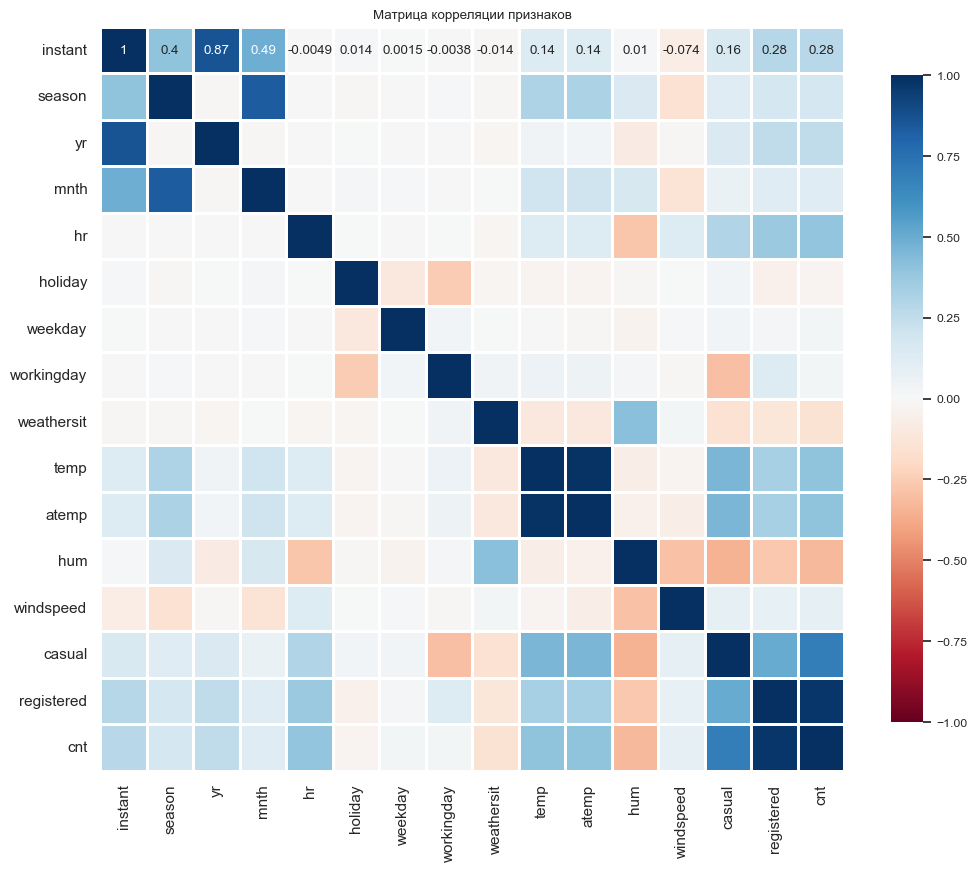

In [50]:
import matplotlib.pyplot as plt
sns.set(style="white")

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8)

# Построить тепловую карту
sns.heatmap(
            data=corr_df, 
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu',
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');


# Матрица смежности

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 700x700 with 0 Axes>

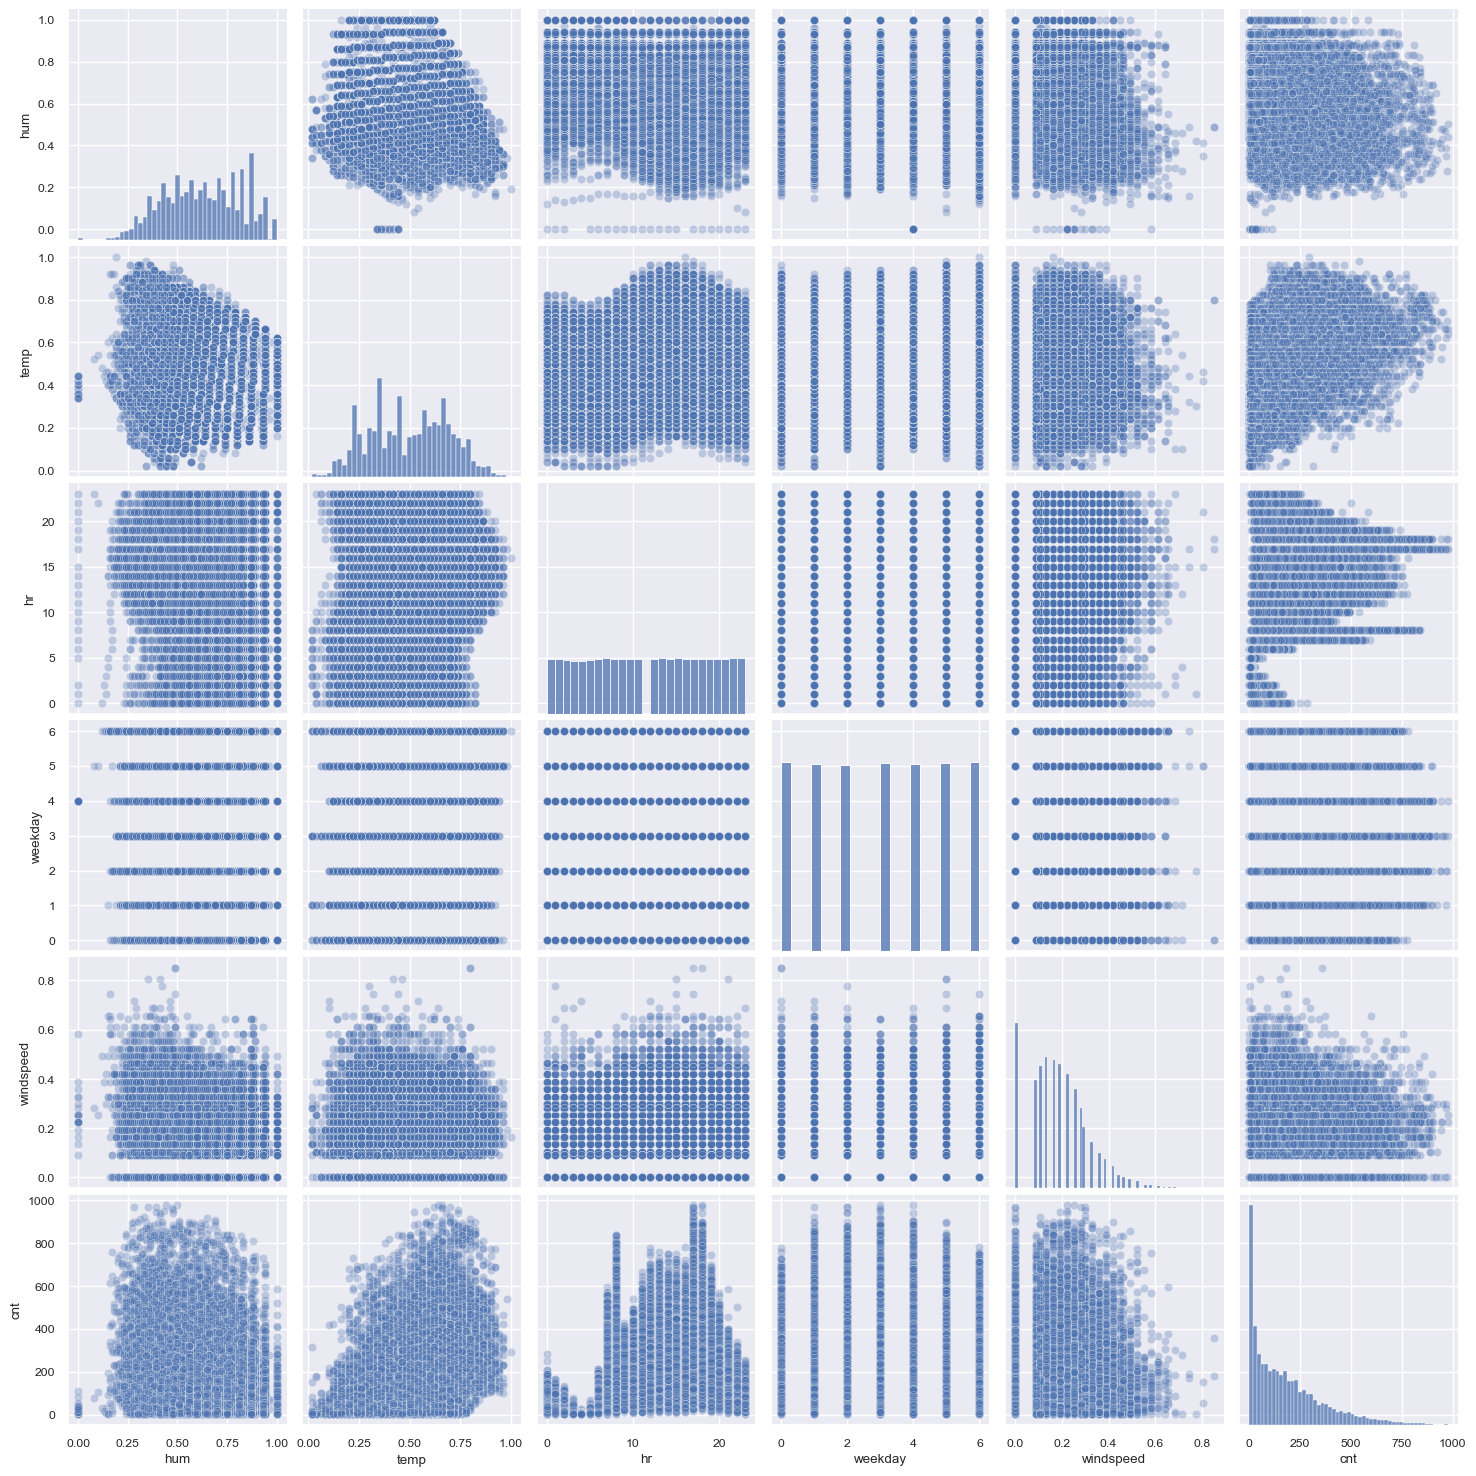

In [51]:
# График признаков попарно
plt.figure(figsize=(7,7))
# %config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков

sns.pairplot(
    df_digPlus[features + target],
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha':0.3} # прозрачность точек
);

# Информация о целевом значении и признаках на него влияющих

В качестве целевой переменной выберем количество велосипедов. В качестве независимых возьмём количество зарегистрированных пользователей, количество случайных пользователей, влажность, температуру и время. С ростом числа пользователей, температуры и времени, увеличивается и число велосипедов. С увеличением влажности число людей снижается.

# Результат отчистки выбранных признаков исходного массива от выбросов

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

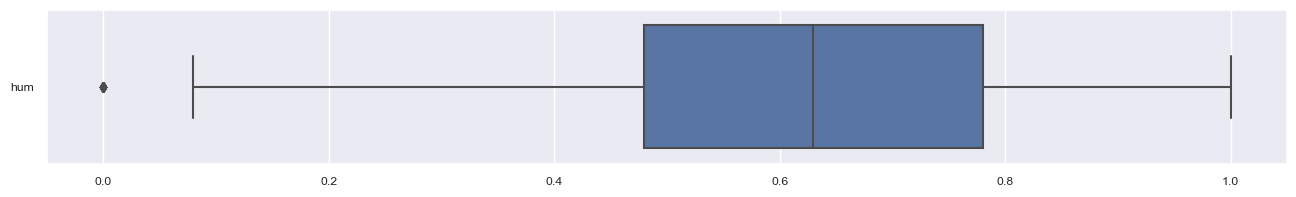

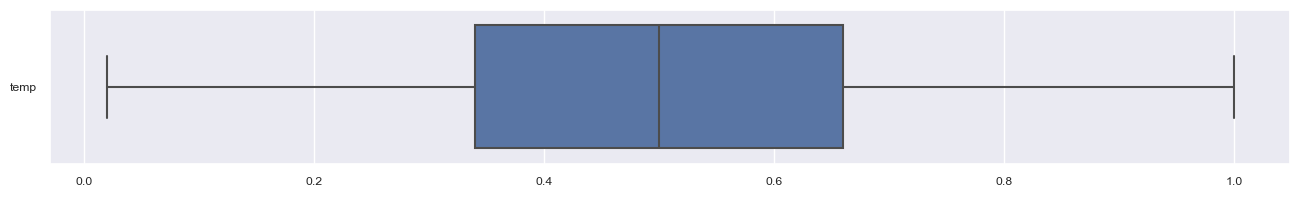

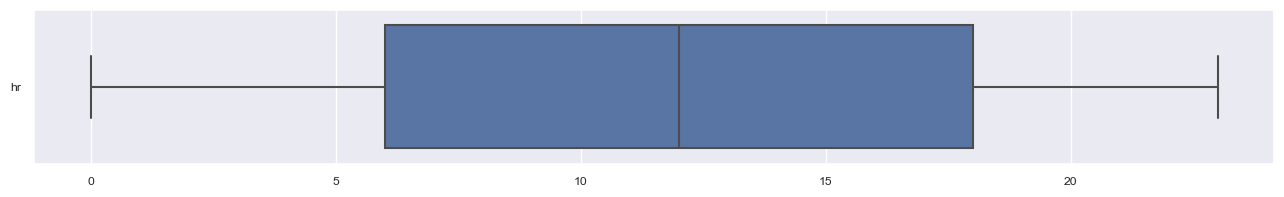

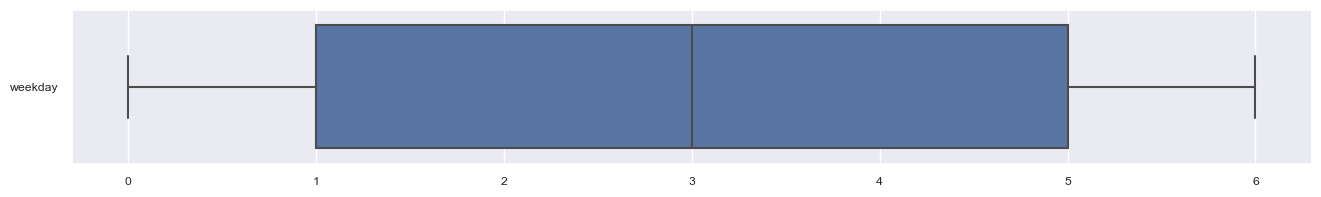

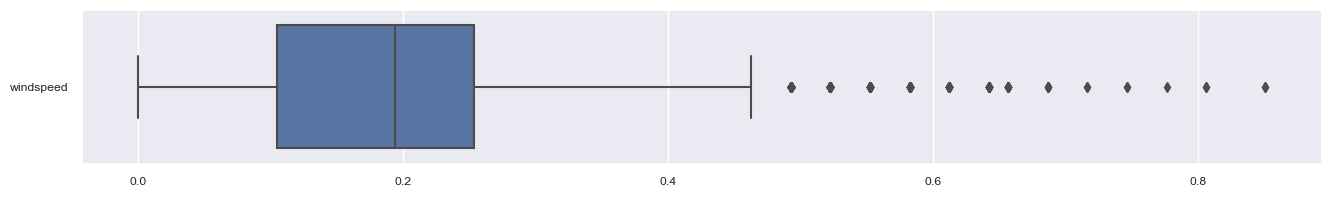

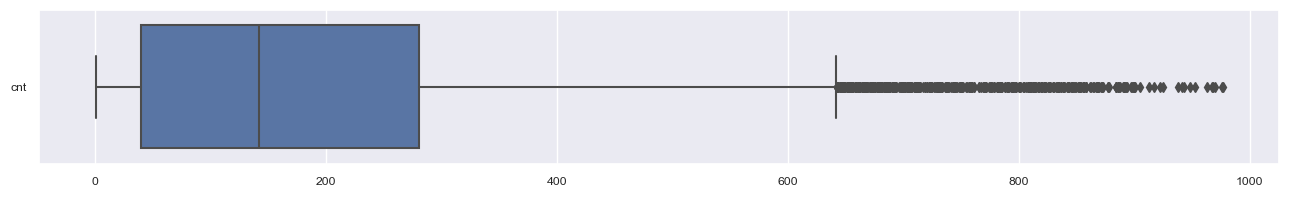

In [52]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features+target):

    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=df_digPlus[[feature_name]], # данные
                 orient='h' # ориентация графика
               )

In [55]:
features

['hum', 'temp', 'hr', 'weekday', 'windspeed']

In [57]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
tressholdDict = {
    'registered'     : (0,500)            , 
    'casual' : (0,115)     , 
    'hum'  : (0.08,1)        , 
    'temp'     : (0.01, 1) , 
    'hr'     : (0,23) , 
    'cnt'     : (0,620) , 
    'windspeed':(0,0.47)
}

print (tressholdDict)

{'registered': (0, 500), 'casual': (0, 115), 'hum': (0.08, 1), 'temp': (0.01, 1), 'hr': (0, 23), 'cnt': (0, 620), 'windspeed': (0, 0.47)}


Узнаем, какая часть выходит за пределы выбранных значений

In [58]:
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df_digPlus[
                            ~((df_digPlus[feature_name] >= threesMin ) & (df_digPlus[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                          ]
                    )

    dcount = df_digPlus[feature_name].count() # кол-во эл. общее

    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

registered. Принимаем пороговые значение равными (0, 500).
  Кол-во эл. вне пороговых - 662 из 17048 значение(ий) (3.9%)

casual. Принимаем пороговые значение равными (0, 115).
  Кол-во эл. вне пороговых - 1154 из 17048 значение(ий) (6.8%)

hum. Принимаем пороговые значение равными (0.08, 1).
  Кол-во эл. вне пороговых - 21 из 17048 значение(ий) (0.1%)

temp. Принимаем пороговые значение равными (0.01, 1).
  Кол-во эл. вне пороговых - 0 из 17048 значение(ий) (0.0%)

hr. Принимаем пороговые значение равными (0, 23).
  Кол-во эл. вне пороговых - 0 из 17048 значение(ий) (0.0%)

cnt. Принимаем пороговые значение равными (0, 620).
  Кол-во эл. вне пороговых - 572 из 17048 значение(ий) (3.4%)

windspeed. Принимаем пороговые значение равными (0, 0.47).
  Кол-во эл. вне пороговых - 338 из 17048 значение(ий) (2.0%)


Отфильтруем значения, которые находятся вне пороговых

In [59]:
# Во избежание путаницы создадим для полседующих операций копию исходного объетка
df_digPlusFiltred = df_digPlus.copy()

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]

    df_digPlusFiltred = df_digPlusFiltred[
        (df_digPlusFiltred[feature_name] >= threesMin ) & (df_digPlusFiltred[feature_name] <= tresshMax)
        ]
    print("Обработан ", feature_name )


print ("Отброшено {} строк. Осталось {} строк.".format(
    len(df_digPlus)  - len(df_digPlusFiltred),
    len(df_digPlusFiltred))
)

Обработан  registered
Обработан  casual
Обработан  hum
Обработан  temp
Обработан  hr
Обработан  cnt
Обработан  windspeed
Отброшено 2099 строк. Осталось 14949 строк.


hum 0.08 1.0
temp 0.02 1.0
hr 0.0 23.0
weekday 0.0 6.0
windspeed 0.0 0.4627
cnt 1.0 594.0


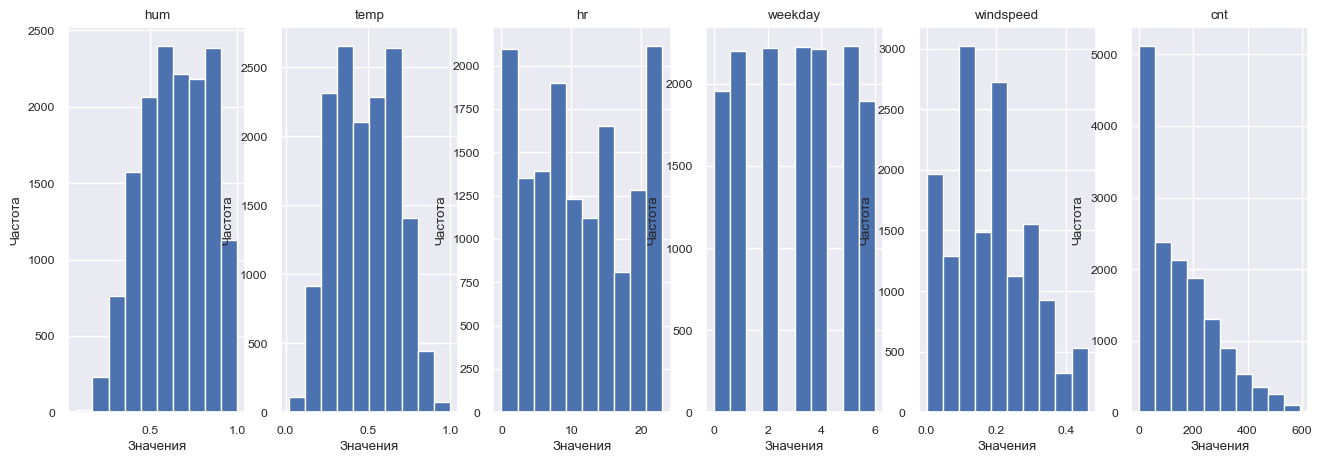

In [60]:
# Строим гистограммы по каждому признаку:
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1

    plt.subplot(1, len(features+target), plot_number)

    plt.hist(df_digPlusFiltred[feature_name]) # Построение гистрограммы

    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name,
           df_digPlusFiltred[feature_name].min(),
           df_digPlusFiltred[feature_name].max())

Сохраним в файл таблицу без выбросов.

In [61]:
df_digPlusFiltred.to_csv('./datasets/bike-sharing-dataset_nan_without_deviations.csv', 
            index=False, 
           )

# Результаты анализа полученных регрессионных линейных моделей

Сделаем обучающие и тестовые выборки:

In [62]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_digPlusFiltred[features],    # исходные данные X
    df_digPlusFiltred[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)

print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(y_test),
    len(x_train)+len(x_test), len(y_train)+len(y_test),
))

Кол-во элементов: 
  x_train: 10464, y_train 10464 
  x_test:  4485, y_test  4485 
  total x: 14949, total y 14949 


Содержимое тестовой и обучающей выборки:

In [63]:
row_count=3
print('Обучающая выборка, x\n',x_train[:row_count])
print('\nОбучающая выборка, y\n',y_train[:row_count])
print('\nТестовая выборка, x\n',x_test[:row_count])
print('\nТестовая выборка, y\n',y_test[:row_count])

Обучающая выборка, x
         hum  temp    hr  weekday  windspeed
6949   0.66  0.38   4.0      6.0     0.0896
8019   0.77  0.46  19.0      1.0     0.0000
14435  0.37  0.76  16.0      3.0     0.1343

Обучающая выборка, y
          cnt
6949     8.0
8019   308.0
14435  493.0

Тестовая выборка, x
         hum  temp    hr  weekday  windspeed
4694   0.56  0.84  12.0      2.0     0.0896
3081   0.88  0.50   7.0      5.0     0.1642
17130  0.39  0.32  13.0      5.0     0.4179

Тестовая выборка, y
          cnt
4694   153.0
3081   157.0
17130  240.0


Построим регрессионыые модели от переменных. Создадим экземпляр sklearn.linear_model.LinearRegression().

In [64]:
model_lin_empty = linear_model.LinearRegression()

Подберём коэффициенты

## От единственной переменной

In [81]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
model_lin_casual = model_lin_empty.fit(
    x_train[['hr']],
    y_train[['cnt']]
)

Важно получить данные и от тестовой выборки

In [82]:
# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_casual = model_lin_casual.predict(x_test[['hr']])

## От набора x1,x2,x3

In [67]:
model_lin_empty = linear_model.LinearRegression()
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
model_lin_x1x2x3 = model_lin_empty.fit(
    x_train[['weekday','hum','hr']],
    y_train[['cnt']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_x1x2x3 = model_lin_x1x2x3.predict(x_test[['weekday','hum','hr']])

## От набора x4,x5,x6

In [109]:
model_lin_empty = linear_model.LinearRegression()
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
model_lin_x4x5x6 = model_lin_empty.fit(
    x_train[['windspeed','hum','temp']],
    y_train[['cnt']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_x4x5x6 = model_lin_x4x5x6.predict(x_test[['windspeed','hum','temp']])

In [110]:
model_lin_x4x5x6.coef_

array([[  42.9168657 , -197.81460939,  244.77407948]])

# Уравнение линейной регрессии

## От единственной переменной

In [83]:
print ("Линейная одномерная регрессия. Признак 'weekday'.")
print ("y_pred_casual (x) = x * {} + {}\n".format(
              model_lin_casual.coef_,
              model_lin_casual.intercept_))

Линейная одномерная регрессия. Признак 'weekday'.
y_pred_casual (x) = x * [[8.21852139]] + [57.10718038]


## От набора x1,x2,x3

In [84]:
print ("Линейная трёхмерная регрессия. Признаки 'weekday','hum','hr'.")
print ("y_pred_x1x2x3 (x1,x2,x3) = x1 * {} + x2 * {} + x3 * {}  + {}\n".format(
              model_lin_x1x2x3.coef_[0][0],
              model_lin_x1x2x3.coef_[0][1],
              model_lin_x1x2x3.coef_[0][2],
              model_lin_x1x2x3.intercept_[0]))

Линейная трёхмерная регрессия. Признаки 'weekday','hum','hr'.
y_pred_x1x2x3 (x1,x2,x3) = x1 * 1.7325909522000011 + x2 * -142.4383407404628 + x3 * 7.315028625191218  + 154.01034080865145


## От набора x4,x5,x6

In [106]:
model_lin_x4x5x6.coef_[0]

array([8.21852139])

In [105]:
print ("Линейная трёхмерная регрессия. Признаки 'windspeed','hum','temp'.")
print ("y_pred_x4x5x6 (x4,x5,x6) = x4 * {} + x5 * {} + x6 * {}  + {}\n".format(
              model_lin_x4x5x6.coef_[0],#[0],
              # model_lin_x4x5x6.coef_[0][1],
              # model_lin_x4x5x6.coef_[0][2],
              model_lin_x4x5x6.intercept_[0]))

Линейная трёхмерная регрессия. Признаки 'windspeed','hum','temp'.


IndexError: Replacement index 2 out of range for positional args tuple

# Оценка точности R2 и RMSE

## От единственной переменной

С помощью функций sklearn.metrics.* сравним реальные и вычисленные значениямя и получим важные оценки качества модели

In [86]:
'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae_casual  = metrics.mean_absolute_error        (y_test, y_pred_casual)
mse_casual  = metrics.mean_squared_error(y_test, y_pred_casual)
rmse_casual = np.sqrt(mse_casual)
r2_casual   = metrics.r2_score                   (y_test, y_pred_casual)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae_casual ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse_casual ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse_casual ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2_casual ))

MAE :    91.300 (средняя абсолютная ошибка)
MSE : 13,598.033814 (среднеквадратичная ошибка)
RMSE: 116.610608 (кв. корень из среднеквадратичной ошибки)
R2  :     0.194 (коэфф. детерминации)


## От набора x1,x2,x3

In [87]:
'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae_x1x2x3  = metrics.mean_absolute_error        (y_test, y_pred_x1x2x3)
mse_x1x2x3  = metrics.mean_squared_error(y_test, y_pred_x1x2x3)
rmse_x1x2x3 = np.sqrt(mse_x1x2x3)
r2_x1x2x3   = metrics.r2_score                   (y_test, y_pred_x1x2x3)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae_x1x2x3 ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse_x1x2x3 ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse_x1x2x3 ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2_x1x2x3 ))

MAE :    87.786 (средняя абсолютная ошибка)
MSE : 13,000.528388 (среднеквадратичная ошибка)
RMSE: 114.019860 (кв. корень из среднеквадратичной ошибки)
R2  :     0.229 (коэфф. детерминации)


## От набора x4,x5,x6

In [88]:
'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae_x4x5x6  = metrics.mean_absolute_error        (y_test, y_pred_x4x5x6)
mse_x4x5x6  = metrics.mean_squared_error(y_test, y_pred_x4x5x6)
rmse_x4x5x6 = np.sqrt(mse_x4x5x6)
r2_x4x5x6   = metrics.r2_score                   (y_test, y_pred_x4x5x6)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae_x4x5x6 ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse_x4x5x6 ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse_x4x5x6 ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2_x4x5x6 ))

MAE :    88.586 (средняя абсолютная ошибка)
MSE : 12,940.453632 (среднеквадратичная ошибка)
RMSE: 113.756115 (кв. корень из среднеквадратичной ошибки)
R2  :     0.233 (коэфф. детерминации)


# График полученной линейной зависимости

## От единственной переменной

Построим график рассеяния

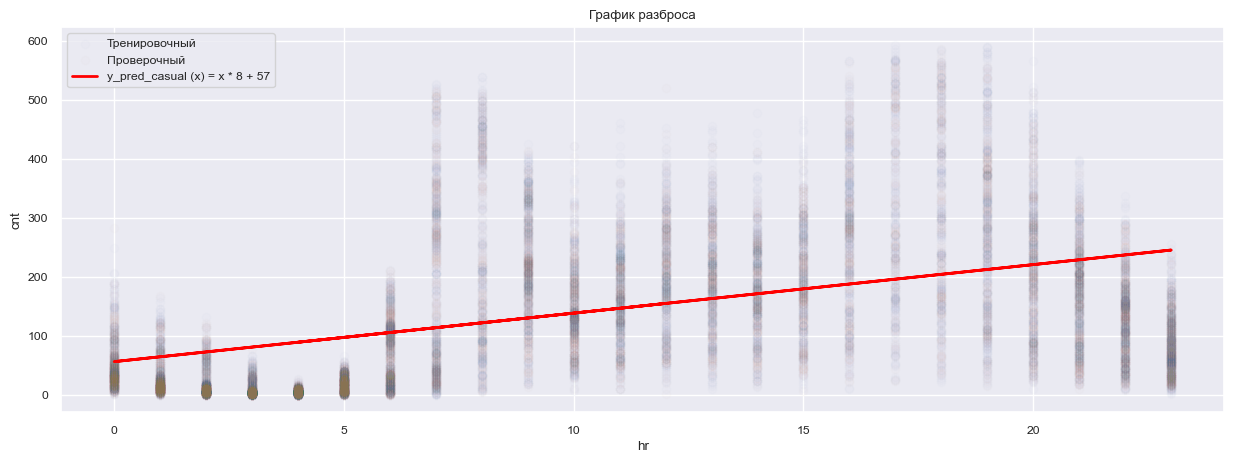

In [93]:
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(15,5))

# Нанести график рассеяния - plt.scatter
plt.scatter(x_train[['hr']],  y_train[['cnt']], alpha=0.01, label='Тренировочный') # тренировочный
plt.scatter(x_test[['hr']],   y_test[['cnt']],  alpha=0.01, label='Проверочный')   # проверочный

# Нанести график - линии через точки - plt.plot
label_str = "y_pred_casual (x) = x * {:.0f} + {:.0f}".format(model_lin_casual.coef_[0][0], model_lin_casual.intercept_[0])

plt.plot( x_test[['hr']], y_pred_casual,
            lw=2, color='red', label=label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('hr') # подпись осей
plt.ylabel(target[0])   # подпись осей
plt.title(u'График разброса'); # Заголовок

# Диаграмма рассеяния

Построим еще пару графиков для визуальной оценки качества модели

## От единственной переменной

Text(0, 0.5, 'Абсолютная ошибка')

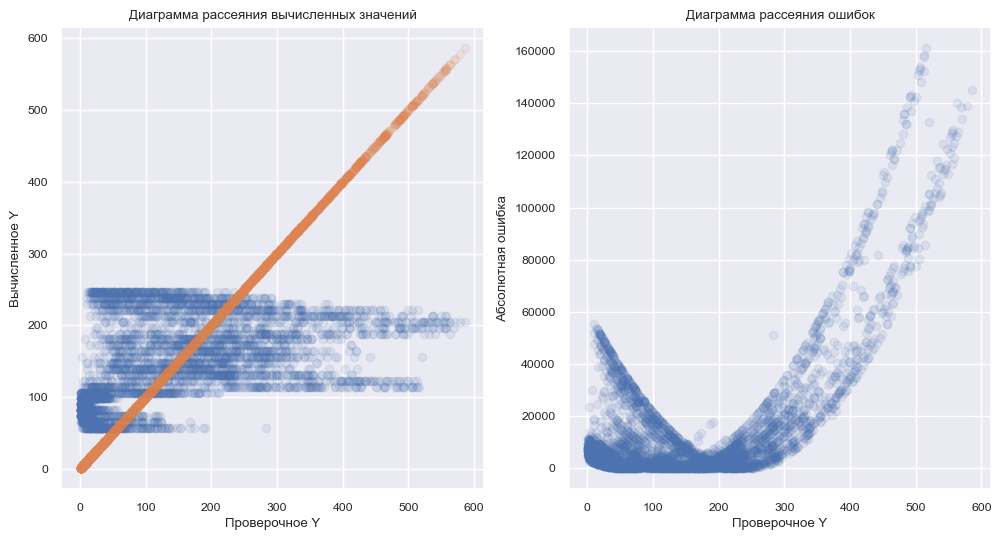

In [94]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_casual,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_casual)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')


## От набора x1,x2,x3

Text(0, 0.5, 'Абсолютная ошибка')

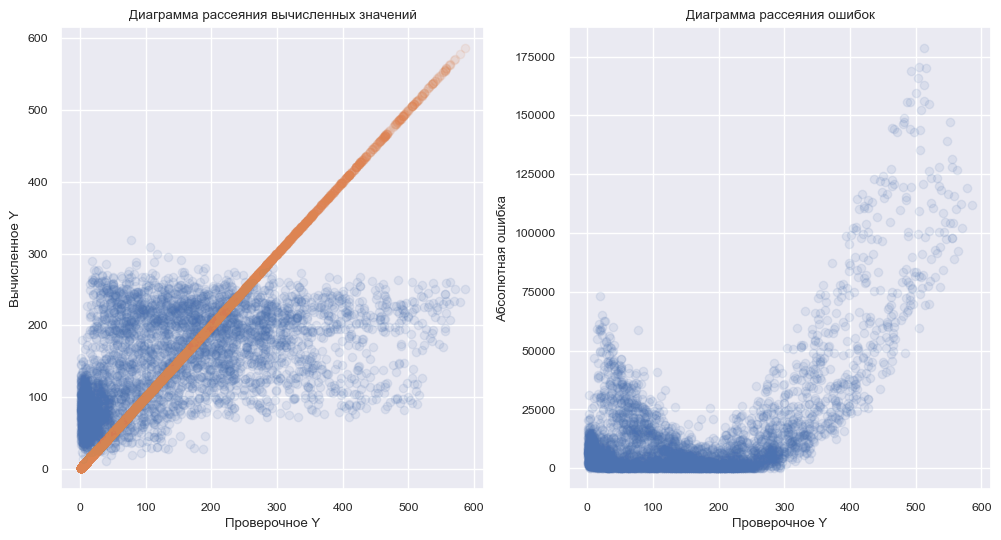

In [101]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_x1x2x3,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_x1x2x3)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')


## От набора x4,x5,x6

Text(0, 0.5, 'Абсолютная ошибка')

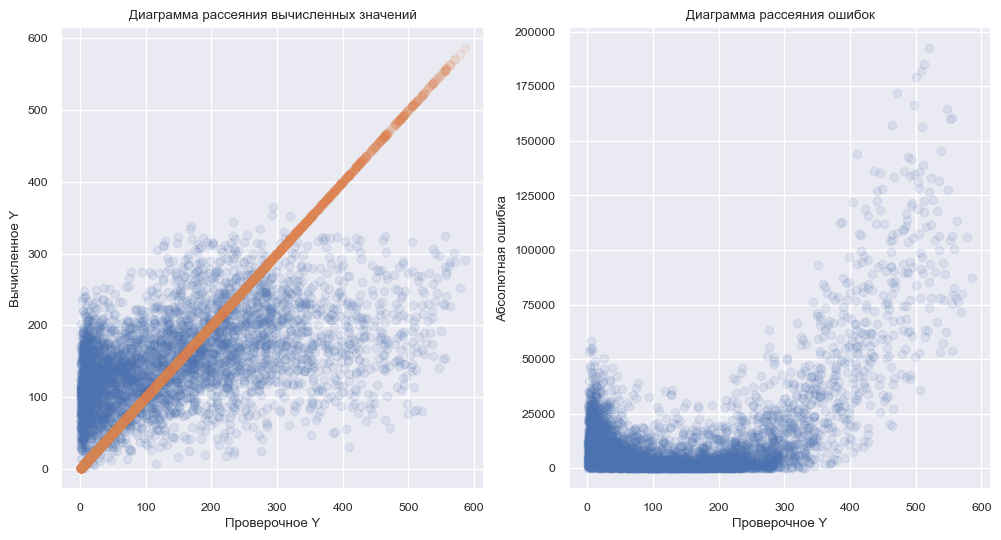

In [102]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_x4x5x6,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_x4x5x6)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')


# Гистограмма остатков

Построим гистограмму ошибок:

## От единственной переменной

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

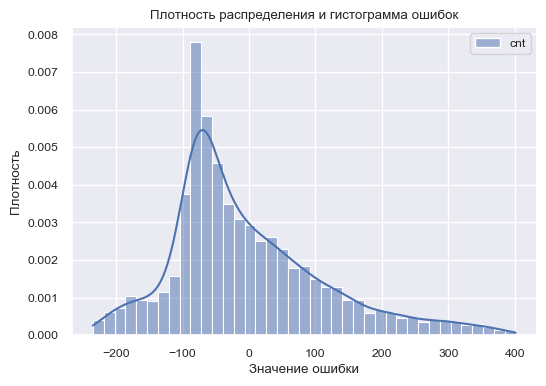

In [97]:
plt.figure(figsize=(6,4))
# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['cnt']] - y_pred_casual,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )
# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

## От набора x1,x2,x3

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

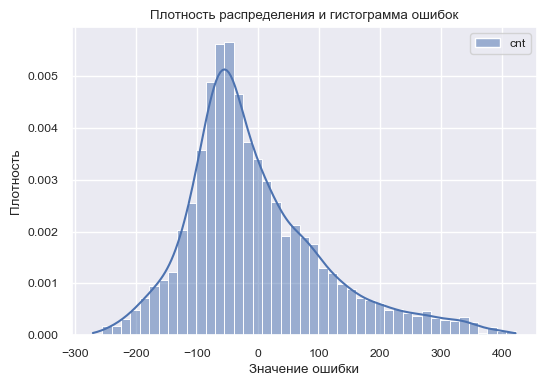

In [98]:
plt.figure(figsize=(6,4))
# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['cnt']] - y_pred_x1x2x3,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )
# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

## От набора x4,x5,x6

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

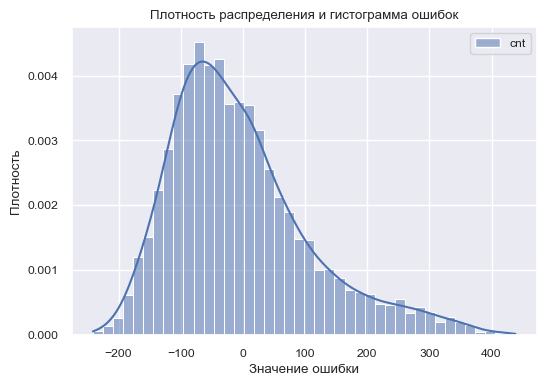

In [99]:
plt.figure(figsize=(6,4))
# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['cnt']] - y_pred_x4x5x6,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )
# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

# Сравнение R2 и RMSE

In [111]:
ddf = pd.DataFrame (
    {
        "Признак": ["casual", "x1, x2, x3", "x4, x5, x6"],
        "K":       [model_lin_casual.coef_[0],     model_lin_x1x2x3.coef_[0],     model_lin_x4x5x6.coef_[0]],
        "B":       [model_lin_casual.intercept_[0],     model_lin_x1x2x3.intercept_[0],     model_lin_x4x5x6.intercept_[0]],
        "MAE":     [mae_casual,     mae_x1x2x3,     mae_x4x5x6],
        "RMSE":    [rmse_casual,     rmse_x1x2x3,     rmse_x4x5x6],
        "R2":      [r2_casual,      r2_x1x2x3,     r2_x4x5x6],
    }
 )
ddf

,Признак,K,B,MAE,RMSE,R2
0,casual,[8.218521394427874],57.107180,91.299970,116.610608,0.193808
1,"x1, x2, x3","[1.7325909522000011, -142.4383407404628, 7.315...",154.010341,87.785864,114.019860,0.229232
2,"x4, x5, x6","[42.91686569657099, -197.814609390957, 244.774...",151.246869,88.586468,113.756115,0.232794


# Выводы

В ходе выполнения данной лабораторной работы была проанализирована база данных о прокате велосипедов. Мы выбрали целевой признак и влияющие параметры. Были составлены 3 регрессионные модели. Оказалось, что сильнее всего на количество велосипедов, взятых в прокат влияет совокупность признаков влажности, температуры и числа зарегестрированных пользователей. Наибольший коэффициент детерминации и был установлен в данной группе признаков. Число случайных пользователей влияет на количество велосипедов с вдвое меньшим коэффициентом. Зато в совокупности с влажностью и временем, коэффициент детерминации повышается. А ошибки идут на спад. Самые маленькие ошибки показала последняя группа признаков: влажность, температура и число зарегестрированных пользователей